In [96]:
import pandas as pd
from pandasql import sqldf 
import matplotlib.pyplot as plt

# Quitar Unnamed y usar df

In [97]:
df = pd.read_csv('./data/final_sentiment.csv')
# Eliminamos: 'l'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['Unnamed: 0.1'])
print(len(df))
df.head()

60425


,id_news,url,title,date,title_label,title_score
0,6203826.0,https://www.elciudadano.com/justicia/documenta...,Documentalista Elena Varela es declarada inoce...,2010-04-22,NEU,0.990564
1,6203930.0,https://www.elciudadano.com/organizacion-socia...,"Ministra del Sernam se reunió con lesbianas, g...",2010-04-20,NEU,0.978593
2,6204013.0,https://www.elciudadano.com/justicia/derechos-...,"Derechos de autor: Chile, el país que más pena...",2010-04-20,NEG,0.998350
3,6204036.0,https://www.elciudadano.com/justicia/ultimo-di...,Último dictador argentino fue condenado a 25 a...,2010-04-20,NEG,0.990725
4,6204039.0,https://www.elciudadano.com/organizacion-socia...,Los trabajadores de El Peñón por prácticas ant...,2010-04-20,NEG,0.997086


### Desglosamos 'title_label' en 3 columnas: 'positividad', 'negatividad' y 'neutro'

In [98]:
# Separaremos el 'title_label' en 'positividad', 'neutro', 'negatividad'
# Si 'title_label' == 'POS' -> 'positividad' = 1, 'neutro' = 0, 'negatividad' = 0
# Si 'title_label' == 'NEU' -> 'positividad' = 0, 'neutro' = 1, 'negatividad' = 0
# Si 'title_label' == 'NEG' -> 'positividad' = 0, 'neutro' = 0, 'negatividad' = 1
df['positividad'] = df['title_label'].apply(lambda x: 1 if x == 'POS' else 0)
df['neutro'] = df['title_label'].apply(lambda x: 1 if x == 'NEU' else 0)
df['negatividad'] = df['title_label'].apply(lambda x: 1 if x == 'NEG' else 0)

In [99]:
# Cambiamos 'date' a formato datetime : Esto es para poder hacer un plot de la evolución de los sentimientos
df['date'] = pd.to_datetime(df['date'])
df.head()

,id_news,url,title,date,title_label,title_score,positividad,neutro,negatividad
0,6203826.0,https://www.elciudadano.com/justicia/documenta...,Documentalista Elena Varela es declarada inoce...,2010-04-22,NEU,0.990564,0,1,0
1,6203930.0,https://www.elciudadano.com/organizacion-socia...,"Ministra del Sernam se reunió con lesbianas, g...",2010-04-20,NEU,0.978593,0,1,0
2,6204013.0,https://www.elciudadano.com/justicia/derechos-...,"Derechos de autor: Chile, el país que más pena...",2010-04-20,NEG,0.998350,0,0,1
3,6204036.0,https://www.elciudadano.com/justicia/ultimo-di...,Último dictador argentino fue condenado a 25 a...,2010-04-20,NEG,0.990725,0,0,1
4,6204039.0,https://www.elciudadano.com/organizacion-socia...,Los trabajadores de El Peñón por prácticas ant...,2010-04-20,NEG,0.997086,0,0,1


### Agrupamos por fecha (diario) y sumamos los valores, eliminamos 'id_news' y 'title_score'

In [100]:
# Agrupamos por fecha
df_contabilidad = df.groupby(['date']).sum()
# removemos 'id_news' y 'title_score'
df_contabilidad = df_contabilidad.drop(columns=['id_news', 'title_score'])

# Creamos una columna con el total
df_contabilidad['total'] = df_contabilidad['positividad'] + df_contabilidad['neutro'] + df_contabilidad['negatividad']
df_contabilidad.head()

C:\Users\darko\AppData\Local\Temp\ipykernel_23932\1614627123.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_contabilidad = df.groupby(['date']).sum()


,positividad,neutro,negatividad,total
date,,,,
2010-01-01,0,2,3,5
2010-01-02,0,5,3,8
2010-01-03,1,3,2,6
2010-01-04,0,7,1,8
2010-01-05,0,4,1,5


### Agrupamos por fecha (anual y mensual)

In [101]:
# Ordenamos por fecha
df_contabilidad = df_contabilidad.sort_values(by=['date'])
df_contabilidad = df_contabilidad.groupby([df_contabilidad.index.year, df_contabilidad.index.month]).sum()

In [102]:
df_contabilidad

positividad  neutro  negatividad  total
date date                                         
2010 1               7      74           54    135
     2              15      51           43    109
     3               6      72           60    138
     4               7      75           70    152
     5               5      77           54    136
...                ...     ...          ...    ...
2021 8              55     261          158    474
     9              64     226          149    439
     10             63     250          149    462
     11             59     238          128    425
     12             52     279          162    493

[144 rows x 4 columns]

In [103]:
# Fecha donde está el máximo
df_contabilidad[df_contabilidad['total'] == df_contabilidad['total'].max()]


,,positividad,neutro,negatividad,total
date,date,,,,
2018,5,117,820,440,1377


### Graficamos noticias positivas, negativas y neutras (tick = 1 mes)

C:\Users\darko\AppData\Local\Temp\ipykernel_23932\842816151.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years);


144


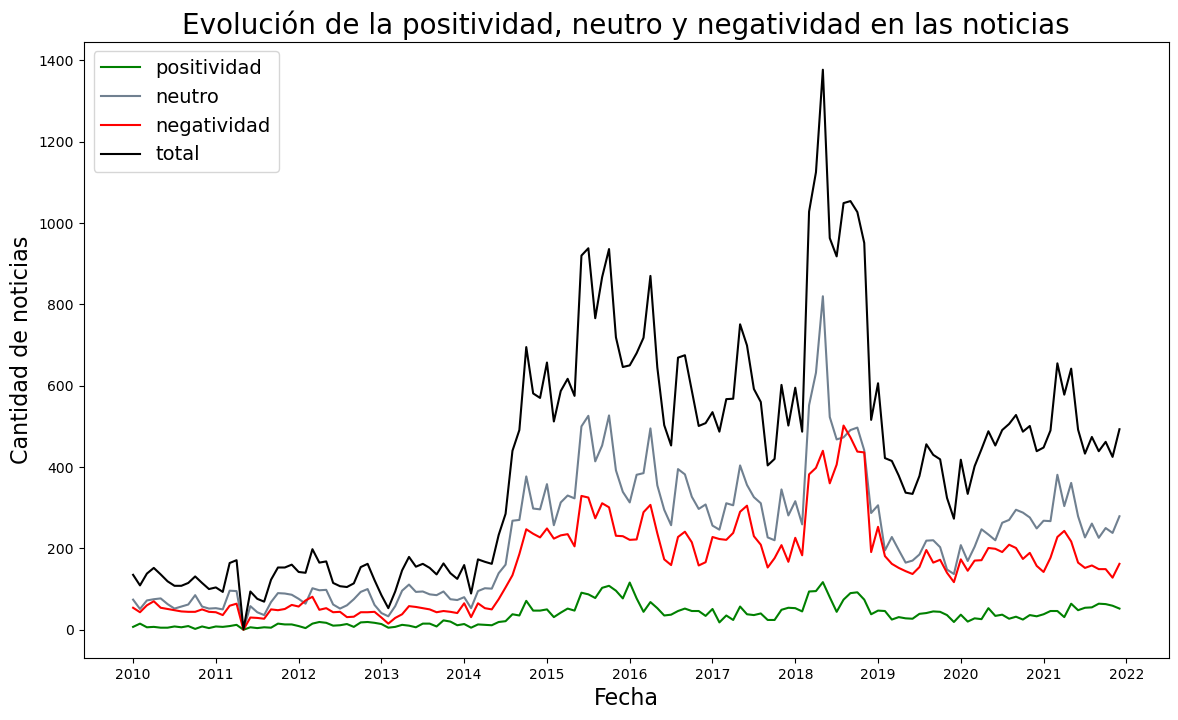

In [128]:
# - - - Graficamos la evolución de la positividad - - -
fig, ax = plt.subplots(figsize=(14,8))

rango = range(len(df_contabilidad))
# Calculamos el año mínimo y máximo, +1 para incluir el último año y +1 para que se vea el inicio del último año (2022 en este caso)
years = range(df_contabilidad.index.get_level_values(0).min(), df_contabilidad.index.get_level_values(0).max()+2)
# - - - Plots - - -
ax.plot(rango , df_contabilidad['positividad'], label='positividad', color='green');
ax.plot(rango , df_contabilidad['neutro'], label='neutro', color='slategrey');
ax.plot(rango , df_contabilidad['negatividad'], label='negatividad', color='red');
ax.plot(rango , df_contabilidad['total'], label='total', color='black');
# - - - Info Plots - - -
ax.legend(loc='upper left', fontsize=14);
ax.set_title('Evolución de la positividad, neutro y negatividad en las noticias', fontsize=20);
# - - - Info Ejes - - -
ax.set_ylabel('Cantidad de noticias', fontsize=16);
ax.set_xlabel('Fecha', fontsize=16);
ax.set_xticklabels(years);
# El +1 es para que no se vea cortado el último mes (145 semanas en total) 
ax.set_xticks(range(0, len(df_contabilidad)+1, (len(df_contabilidad) // 12)));


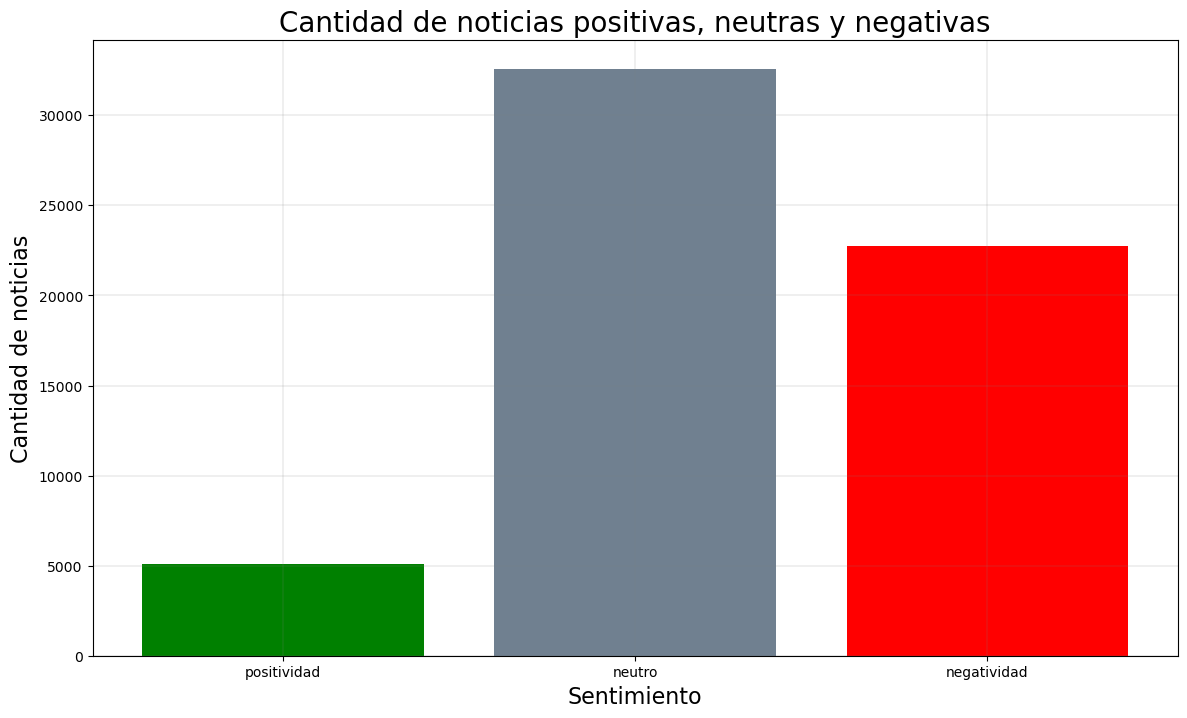

In [156]:
# - - - Graficamos histograma de la suma de 'positividad' 'neutro' 'negatividad - - -
fig, ax = plt.subplots(figsize=(14,8))

# - - - Plots - - -
total_pos = df_contabilidad['positividad'].sum()
total_neu = df_contabilidad['neutro'].sum()
total_neg = df_contabilidad['negatividad'].sum()
ax.bar(['positividad', 'neutro', 'negatividad'], [total_pos, total_neu, total_neg], color=['green', 'slategrey', 'red']);
# - - - Info Plots - - -
ax.set_title('Cantidad de noticias positivas, neutras y negativas', fontsize=20);
# - - - Info Ejes - - -
ax.set_ylabel('Cantidad de noticias', fontsize=16);
ax.set_xlabel('Sentimiento', fontsize=16);
# add grid
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.7)

### Algunas consultas

In [142]:
# Mostrar solo noticias POS y el titulo
df_consultas = df[df['title_label'] == 'NEU']
df_consultas = df_consultas[['title', 'title_label']]

In [145]:
for i in range(15):
    # 'revolvemos' el dataframe
    df_consultas = df_consultas.sample(frac=1)
    print(df_consultas.iloc[i]['title'])

No hay caso: avionetas aterrizan en Desierto Florido para almorzar y el jefe de SQM estaría entre ellos
Contraloría venezolana revisa caso de corrupción de Capriles
Unasur rechaza las sanciones impuestas por EEUU contra Venezuela
Sueldos de las FFAA en las “mutualidades”: Fiscal nacional pedirá a Contraloría todos los antecedentes
Presentan recurso en favor del Machi Celestino Córdova: Piden cambiar prisión por arresto domiciliario durante un periodo de 6 meses
“Rompe paga”: Municipio de Santiago interpondrá acciones legales por toma de Liceo 7
Escribir a mano podría hacernos más sensibles e inteligentes
¿La Consulta Popular de Guaidó es tan ‘confiable’ como las elecciones gringas?
10 películas que explican los límites del ser humano
Apoyan a indígenas en lucha contra construcción de hidroeléctrica en Guatemala
Kim Jong-un: Corea del Norte está preparada para una guerra nuclear
Venezuela ratifica su disposición de mantener relaciones con la UE y pide respeto al país
Proyecto que sancio